In [1]:
import sklearn
from sklearn import manifold
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs
sklearn.__version__

C:\Users\Florian\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


'0.23.2'

In [2]:
import numpy as np
np.__version__

'1.19.2'

In [3]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
matplotlib.__version__

'3.3.2'

# Plotte results from python manifold.MDS-algorithm

In [13]:
data = [[0,548,289,576,586], [548,0,493,195,392], [289,493,0,427,776], [576,195,427,0,577], [586, 392, 776,577,0]]
data_true = np.array(data)
data_true.shape

(5, 5)

In [14]:
embedding = manifold.MDS(n_components=2, \
                         metric=True, \
                         n_init=1, \
                         max_iter=1, \
                         eps=1e-3, \
                         n_jobs=None, \
                         random_state=0, \
                         dissimilarity="euclidean")
data_transformed = embedding.fit_transform(data_true)
data_transformed.shape

C:\Users\Florian\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


(5, 2)

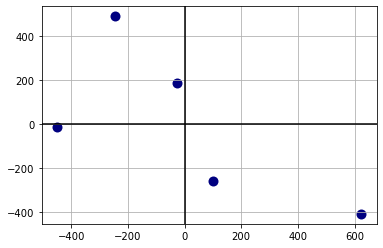

In [15]:
fig, ax = plt.subplots()
ax.scatter(data_transformed[:, 0], data_transformed[:, 1], color='navy', s=100, lw=0, label='Transformed Position')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [12]:
data_transformed

array([[ 0.74699976,  3.41673847],
       [ 1.73827364,  0.87708895],
       [-1.44213859,  2.63650006],
       ...,
       [ 2.52640358,  3.18507135],
       [ 4.83481606,  1.28737696],
       [ 0.93026683,  1.2408372 ]])

# Plottet results from javascripot-algorithm

#### Transpose + sqrt(initdata) (not sqrt(result)) + with eigenvalue-multiplication

In [8]:
data_javascript = np.array([[ 232.35484476052474, 142.59971755043827 ],[ 60.45010386058542, 216.03844270154065 ], [ -140.53474206213292, 46.80743942332405 ], [ 246.05150442490455, -209.33007841377955 ],[ -259.5058908283855, -45.82081188819328 ]])
data_javascript[:, 0]

array([ 232.35484476,   60.45010386, -140.53474206,  246.05150442,
       -259.50589083])

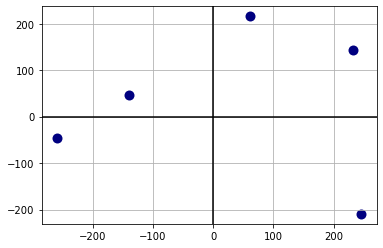

In [9]:
fig, ax = plt.subplots()
ax.scatter(data_javascript[:, 0], data_javascript[:, 1], color='navy', s=100, lw=0, label='Transformed Position')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

### Transpose + no try to normalize + without eigenvalue-multiplication

In [10]:
data_javascript = np.array([[ 0.5689576445098888, 0.39628168023471705 ], [ -0.3083575387458514, 0.2805207518634251 ], [ 0.13617593270844544, 0.5977959979423801 ], [ 0.3452391410136276, -0.6378940619795804 ], [ -0.665934589817586, 0.0002195896007137167 ]])
data_javascript[:, 0]

array([ 0.56895764, -0.30835754,  0.13617593,  0.34523914, -0.66593459])

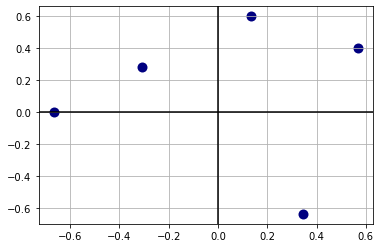

In [11]:
fig, ax = plt.subplots()
ax.scatter(data_javascript[:, 0], data_javascript[:, 1], color='navy', s=100, lw=0, label='Transformed Position')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# Test scalability

In [39]:
X, y_true = make_blobs(n_samples=16000, n_features=100, centers=4, cluster_std=0.60, random_state=0)
X.shape

(16000, 100)

#### laufzeit
16k, 100 features
2min

In [40]:
embedding = manifold.MDS(n_components=2, \
                         metric=True, \
                         n_init=1, \
                         max_iter=1, \
                         eps=1e-3, \
                         n_jobs=None, \
                         random_state=0, \
                         dissimilarity="euclidean")
data_transformed = embedding.fit_transform(X)
data_transformed.shape

(16000, 2)

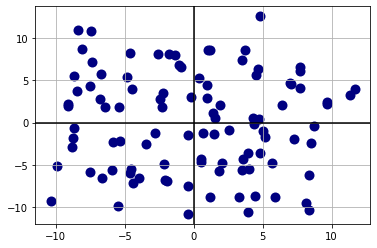

In [30]:
fig, ax = plt.subplots()
ax.scatter(data_transformed[:, 0], data_transformed[:, 1], color='navy', s=100, lw=0, label='Transformed Position')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')